## Name: Gopani Kenil G. 
## Roll No: CE049 
## ID: 19CEUOS080
##  Lab-11


### Part A: Basic SVM with Linear Kernel

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X,y = make_blobs(n_samples=50, n_features=2 ,centers=2,random_state=49)
print(len(X),len(y))

50 50


(40, 2)
(10, 2)


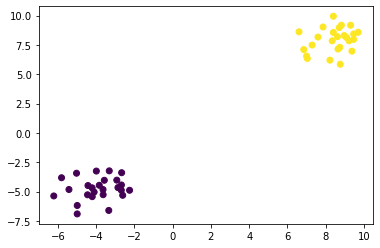

In [3]:
# plotting scatters
plt.scatter(X[:,0],X[:,1],c=y)
# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=49)
print(X_train.shape)
print(X_test.shape)

In [4]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_function(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
    stop = X_set[:, 0].max() + 1,
    step = 0.01),

    np.arange(start = X_set[:, 1].min() - 1,
    stop = X_set[:, 1].max() + 1,
    step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),

    X2.ravel()]).T).reshape(X1.shape),

    alpha = 0.75,
    cmap = zero_one_colourmap)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = (zero_one_colourmap)(i), label = j)

    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [5]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


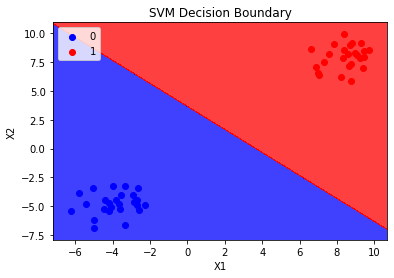

In [6]:
# Train classifier
clf.fit(X_train, y_train)
## Plot decision function on training and test data
plot_decision_function(X, y, clf)

In [7]:
# Make predictions on unseen test data
#clf_predictions = #############################
y_pred = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

Accuracy: 100.0%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


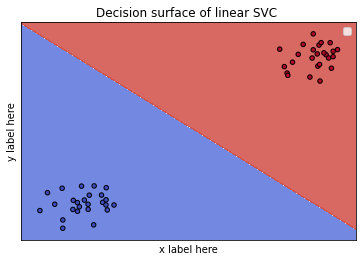

In [8]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Part B : Breast Cancer Prediction Example

In [9]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [10]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# print the names of the 13 features
print("Features: ", cancer.feature_names[:13])

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error']
Labels:  ['malignant' 'benign']


In [12]:
# print data(feature)shape
feature=cancer.data
target=cancer.target
print(feature.shape)
print(target.shape)


(569, 30)
(569,)


In [13]:
# print the cancer labels (0:malignant, 1:benign)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=49)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [15]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')
# Train classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 93.85964912280701
Precision: 95.83333333333334
Recall: 94.52054794520548
